# Welcome to the Dark Art of Coding:
## Introduction to Data Science Fundamentals
Basic Statistics

From count, min, max to variance/standard deviation

<img src='../images/logos.3.600.wide.png' height='250' width='300' style="float:right">

# Main objectives
---

At the end of this lesson, you will be able to:

* Understand how to calculate counts, minimums and maximums
* Understand the measures of central tendencies and the differences between: 
   * mean
   * median
   * mode
* Understand measures of dispersion and the differences between:
   * simple spread
   * quantiles
   * interquartile ranges
   * variance
   * standard deviation

# A broad overview
---




To help us understand some of the concepts we are gonna explore, we will explore most of these measures in several ways:

* through small, simple datasets
* through a larger more sophisticated dataset
* through hand-developed code
* through related functions found in Python's Standard Library and in major data science libraries such as numpy, scipy, and pandas 

To get us started, let's take a look at our large dataset. To do so, we will plot the data using the `matplotlib` library. 

## Defects in batches of parts

Let's simulate the number of defects within a series of part batches.

Given any batch of parts, some of the parts will be defective.

Each number below represents the number of defects within a given batch.

**NOTE**: I manually organized these by roughly by size to make it easier to discuss.

In [1]:
num_defects =  [99, 52, 42, 44, 27, 22, 22, 24, 22, 21,
                21, 18, 18, 15, 19, 19, 18, 17, 18, 16,
                16, 17, 18, 15, 15, 13, 11, 14, 14, 13,
                14, 14, 14, 13, 14, 14, 14, 14, 12, 14,
                13, 12, 11, 12, 13, 13, 12, 13, 11, 13,
                11, 12, 12, 10, 10, 11, 12, 13, 10, 12,
                11, 10, 12, 12, 11, 11, 9, 9, 9, 11,
                12, 8, 8, 10, 8, 10, 11, 10, 9, 10,
                10, 8, 8, 11, 10, 9, 8, 8, 10, 10,
                7, 7, 7, 8, 8, 7, 7, 8, 7, 7,
                9, 7, 7, 10, 7, 8, 9, 9, 6, 6,
                8, 8, 9, 7, 7, 9, 6, 8, 9, 8,
                9, 9, 6, 8, 9, 7, 8, 6, 8, 6,
                6, 6, 6, 6, 6, 8, 7, 8, 7, 5,
                6, 8, 8, 8, 8, 5, 4, 6, 6, 4,
                6, 6, 4, 5, 7, 5, 7, 6, 5, 4,
                6, 4, 7, 5, 6, 4, 4, 6, 6, 3,
                5, 6, 6, 4, 6, 3, 3, 3, 5, 5,
                5, 3, 2, 5, 2, 3, 2, 4, 3, 2,
                5, 2, 2, 2, 3, 4, 4, 4, 5, 5,
                3, 5, 4, 2]         

In [2]:
# The following enables inline plots
# and import matplotlib.pyplot uses plt as an alias

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# importing the Counter class helps us simplify the counting process

from collections import Counter

# Simple Histogram
---

We will start off with a simple display of the most frequent values in the dataset using `Counter`'s `.most_common()` method.

From there, we will use a histogram to help visualize our defects data and then we will use various statistical evaluations to examine that data in greater detail.

In [4]:
# Let's count how many times each defect count appears
#     and look at the five most frequent counts

defect_counts = Counter(num_defects)

for defect_count, freq in defect_counts.most_common(5):
    print(defect_count, '>  ', freq)

8 >   24
6 >   24
7 >   18
5 >   15
9 >   14


## Counters behave a lot like dictionaries, but...

For those who have NOT used Counters before should know that while they might look a lot like dictionaries they not only have the addition `.most_common()` method, they also have another interesting feature

If you look up a key that does not exist, you get back a `0` value (versus a `KeyError` that you would get back from a dictionary).

For example...

```
>>> defect_count[77]     # does NOT exist in the Counter
0

>>> defect_count[8]      # does exist
24
```

## Let's create a series of x values and y values

In [5]:
# We will start off by creating a series of x values
#     and then parse the defect counts for each x value.
# In this case, if we try to extract the value associated with a key
#     that does not exist, we simply get back a 0.

x_values = list(range(101))
y_values = [defect_counts[x] for x in x_values]

print(x_values)
print()
print(y_values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]

[0, 0, 8, 9, 13, 15, 24, 18, 24, 14, 13, 11, 11, 9, 10, 3, 2, 2, 5, 2, 0, 2, 3, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


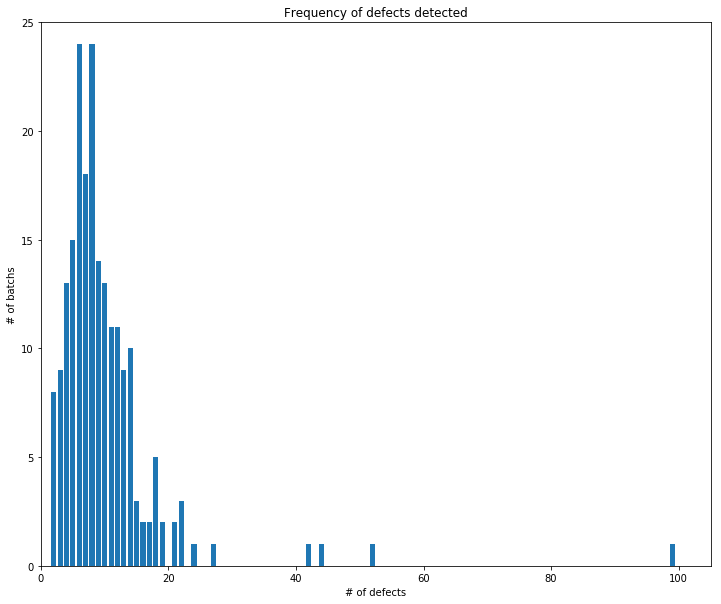

In [6]:
# Let's craft a bar chart using our x and y values...
#     For now, I don't want to focus too much on the mechanics of creating the 
#     graph... just on what the graph can tell us at a glance

#     We will use this picture to help us get a sense for what the data looks like

plt.figure(figsize=(12, 10))
plt.bar(x_values, y_values)
plt.axis([0, 105, 0, 25])
plt.title('Frequency of defects detected')
plt.xlabel('# of defects')
plt.ylabel('# of batchs')
plt.show()

# Simple statistics: 

* count
* maximum
* minimum

In [7]:
# len() returns the total number of elements in a Python sequence

num_points = len(num_defects)

print("Number of data points:", num_points)

Number of data points: 204


In [8]:
# max() and min() return the maximum (or minimum) value from a 
#     Python sequence

largest_value = max(num_defects)
smallest_value = min(num_defects)

print("Largest value:", largest_value)
print("Smallest value:", smallest_value)

Largest value: 99
Smallest value: 2


# Central Tendencies

Measures of central tendency (also called measures of location) give us an idea of what constitutes a typical or common value for a given data set. The three most common measures of central tendency are: 

* mean (also referred to as the arithmetic mean)
* median
* mode

To start off, we will create our own code to calculate these values, but we will shortly turn to more efficient functions offered by Python Libraries. The purpose of the dive into handmade functions to give ourselves a chance to discuss the principles involved.

## mean

The arithmetic mean is what we commonly refer to as the average. It is generally calculated as the total OR sum of all the values divided by the number of values.

In [9]:
def mean(values):
    '''Return the mean (or average) of a sequence of values.
    
    >>> mean([1, 2, 3, 4])
    2.5
    
    >>> mean([1, 2, 3, 4, 5])
    3.0
    
    '''
    return sum(values) / len(values)

In [10]:
# temporarily, let's use a small number of values

mean([1, 2, 3, 4])         # even number of values

2.5

In [11]:
mean([1, 2, 3, 4, 5])      # odd number of values

3.0

Now, let's apply this to our larger dataset:

In [12]:
mean(num_defects)

9.965686274509803

## median

The median is the center-most value in a sorted sequence of values.

**NOTE**: If there are an even number of items, the median is the average of the two center-most values.


In [13]:
def median(values):
    """Return the median value from a sequence of values
    
    >>> median([1, 3, 5])          # odd number of values
    3
    
    >>> median([1, 3, 5, 7])       # even number of values
    4.0
    """
    
    sorted_values = sorted(values)
    num = len(values)
    centerpoint = num // 2         # find the index for the midpoint, truncating
                                   #     any floats...
    
    if num % 2 == 1: 
        # return the center value 
        #     if n is ODD
        return sorted_values[centerpoint]
    
    else:
        # return the average of the two center-most values
        #     if num is EVEN
        c1 = centerpoint - 1
        c2 = centerpoint
        return (sorted_values[c1] + sorted_values[c2]) / 2
    

In [14]:
# median of an odd number of values

odd = [1, 2, 3]

median(odd)

2

In [15]:
# median of an even number of values
# REMINDER: median sorts the values in the sequence before 
#     returning any values

even = [42, 1, 5, 6]

median(even)    

5.5

In [16]:
# median num of tweets recieved

median(num_defects)

8.0

## mode

The mode is the most frequently found value in a sequence of values.


In [17]:
from collections import Counter

def mode(values):
    """Returns a list of the most common (frequent) value(s) 
    
    If there is more than one element with the SAME maximum frequency, then
    return all such elements as a list
    """
    
    mode_values = {}
    counts = Counter(values)
    max_count = max(counts.values())
    
    return [value for value, count in counts.items() if count == max_count]        

In [18]:
mode([1, 2, 3, 4, 4, 4])     # single number (4) is the most frequent

[4]

In [19]:
mode([1, 1, 1, 2, 3, 4, 5, 5, 5])     # two numbers (1 and 5) are most frequent
                                      # this dataset has more than one trend >>> it is called bimodal

[1, 5]

In [20]:
mode(num_defects)

[8, 6]

## mean vs median vs mode

For a quick review of the differences between mean, median and mode:

||Calculation|Application|
|:--|:---|:---|
|mean|sum of values/number of values|symmetrical data with only one trend|
|median|middle value of a sorted sequence of values|skewed data with outlier(s)|
|mode|most frequent value(s)|categorical data OR data with more than one trend/cluster|


## frequency table

Along with `mean`, `mode`, `median` it is sometimes useful to see more broadly how frequently the various values appear. A frequency table is useful for this:

In [21]:
from collections import Counter

def freq_table(values):
    """Returns a series of values and counts in a frequency table 
    """
    
    frequencies = Counter(values)
    print('Value\tFrequency')
    
    for value, count in frequencies.most_common():
        print('{}\t{}'.format(value, count))

In [22]:
freq_table([7, 8, 9, 9, 9, 6, 6])

Value	Frequency
9	3
6	2
7	1
8	1


In [23]:
freq_table(defect_counts)

Value	Frequency
8	24
6	24
7	18
5	15
9	14
10	13
4	13
11	11
12	11
14	10
13	9
3	9
2	8
18	5
22	3
15	3
21	2
19	2
17	2
16	2
99	1
52	1
42	1
44	1
27	1
24	1


# Experience Points
---

## Complete the following exercises:



**A**. Given a list of values:
`values = [1, 2, 3, 4, 5, 11, 12, 13, 14, 15]`

Calculate the following results:

* mean
* median
* mode
* number of values (count)
* maximum value
* minimum value




**B**. Given a sequence of values available from the Python `range()` object starting at 100 up to, but not including 1000 with a step of 3 (i.e. `100, 103, 106 ... 994, 997`):

`nums = range(100, 1000, 3)`

Calculate the following results:

* mean
* median
* mode
* number of values (count)
* maximum value
* minimum value

If you (and your partner, if you're working in pairs) are done, then you can put your green sticky up! This is how we know you're done.

<img src='../images/green_sticky.300px.png' width='200' style='float:left'>

# Measures of Dispersion

Dispersion is a representation of how varied OR spread out our data is. Dispersion may also be refered to as measures of variability OR measures of spread.

## Simple spread

Using the maximum and minimum values, you can calculate the range of spread.

In [24]:
def data_range(x):
    '''Returns the range (i.e. the difference) between the 
    highest and lowest values
    '''
    
    return max(x) - min(x)

In [25]:
data_range([5, 3, 4, 2, 1])

4

In [26]:
data_range(num_defects)

97

## Downsides of using simple spread:

A simple spread is very susceptible to outliers which may not take into account where the **majority** of the datapoints lie...

In the first example, below, the majority of the values are near 7. In the second example, with one exception, the majority of the values are still near 7, but the ranges are vastly different.

```
Example 1: [7, 6, 7, 5, 7, 8]    # range of 3 
Example 2: [7, 6, 7, 5, 7, 99]   # range of 94
```

## Quantiles and interquartile ranges

A method to overcome the weakness of simple spread is to use a narrower range. One way to create a narrower range is to calculate quantiles and interquartile ranges.

|Term|Definition|
|:--- |:--- |
|quantile|a cutpoint OR dividing point in a range of values creating contiguous intervals with equal probabilities|
|quartile|a value that cuts your data into quarters|
|interquartile range|the range between the lower quartile and upper quartile|

We are gonna construct some basic functions. Please note: these are for example only and lack some of the sophistication needed to be used in production. This lack of sophistication yields a lack of precision, etc. But they should be good enough for government work.

### Quantiles

Quantiles are cut points that divide sequence of observations in a sample space into contiguous intervals/groups with equal probabilities.

In the following example we choose a simple cut point that breaks the sample values into two groups. The cut point effectively marks the median.

<img src='images/quantile_halvsies.jpg' height='600' width='600'>

In this next example we choose nine cut points that break the sample values into ten equally-sized groups. 

The cut points mark the 10%, 20%, 30% through 90% points of the data. This more refined set of cut points allows us to fine-tune our approach to filtering out out-liers. As shown in this image, our range would be all values between the 10% and 90% cut points.

<img src='images/quantile_percentile.jpg' height='600' width='600'>

With this in mind, let's create our first function to help calculate where a given quantile falls.

In [27]:
def quantile(values, percentile):
    """Returns the pth-percentile value in a sequence of values
    """
    
    p_index = int(percentile * len(values))
    return sorted(values)[p_index]

In [28]:
# Given a sequence of values, we can calculate a given quantile.
# In this case, we calculate the quantile at the halfway mark (50% OR 0.5)
#     or roughly the median.

grades1 = [85, 87, 89, 55, 65, 67, 75, 80, 91, 96]        # ten values

quantile(grades1, .5)

85

In [29]:
grades2 = [85, 87, 89, 55, 65, 67, 75, 80, 91, 96, 99]    # eleven values

quantile(grades2, .5)

# NOTE: As described above, this function lacks some details
#     it is less detailed than even our median function
#     and does NOT account for the length of the dataset in
#     terms of odd/even num of values

85

In [30]:
# While not as sophisticated as our median calc,
#     we can generally calculate other quantiles, such as the 
#     the 25th percentile
#     or the 75th percentile
#     i.e. the quartiles

print('25%: ', quantile(grades2, .25))
print('75%: ', quantile(grades2, .75))

# sorted for comparison: [55, 65, 67, 75, 80, 85, 87, 89, 91, 96, 99]

25%:  67
75%:  91


To see the percentile breakdown of defects, we can calculate which defect counts fall into which percentiles

It is important to note that the percentile calc simply finds the **NEAREST** index in the defect list to the given percentile and returns the value stored at that index.

In [31]:
for percent in [0.10, 0.25, 0.75, 0.90, 0.95, 0.999]:
    q = quantile(num_defects, percent)
    
    print('Percent: {}\t{}'.format(percent, q))

Percent: 0.1	4
Percent: 0.25	6
Percent: 0.75	12
Percent: 0.9	16
Percent: 0.95	21
Percent: 0.999	99


### Interquartile ranges

To show the range between two quantile values, we can use an interquantile range.

It is very common to use quantiles of 25% and 75%, but other quantiles may be used as well:
* 10% <-> 90%
* 20% <-> 80%
* 30% <-> 70%

It really depends on how much you want to filter out outliers AND your definition of outliers.


This image is focused on the 25% and 75% cut points which are typically called quartiles because the values are divided into quarters:

<img src='images/quantile_quartile.jpg' height='600' width='600'>

In [32]:
def interquartile_range(values):
    '''Return the difference between the 75% and 25% percentiles.
    '''
    
    return quantile(values, 0.75) - quantile(values, 0.25)

In [33]:
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Let's first just confirm the quantile VALUES at the 25% and 75% cut points
print(quantile(values, 0.25), '<->', quantile(values, 0.75))

3 <-> 8


In [34]:
# Now, let's calculate the interquartile range

print(interquartile_range([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]))

5


In [35]:
# We can calculate the interquartile range for our defects data (presuming 75% and 25%)

interquartile_range(num_defects)

6

In [36]:
def interquartile_range(values, upper_bound=0.75, lower_bound=0.25):
    '''Return the difference between the 75% and 25% percentiles.
    '''
    
    return quantile(values, upper_bound) - quantile(values, lower_bound)

interquartile_range(num_defects, 0.9, 0.1)

12

## Downsides of using interquartile range

The interquartile range helps eliminate some of the risks associated with outliers, but still has some weaknesses:

* it can only tell you the difference between a 'high' value and a 'low' value
* it does NOT tell you how often the high values OR low values occur versus how often values occur near the center

We need a method to more accurately measure variability.

# Experience Points
---

## Complete the following exercises:



**A**. Given a list of values:
`values = [1, 2, 3, 4, 5, 11, 12, 13, 14, 15]`

Calculate the following results:

* calculate a simple spread
* calculate the 0.30 and 0.70 quantiles
* calculate the interquartile range for 0.15 and 0.85


**B**. Given a sequence of values available from the Python `range()` object starting at 200 up to, but not including 300 with a step of 5 (i.e. `200, 205, 210 ... 290, 295`):

`nums = range(200, 300, 5)`


Calculate the following results:

* calculate a simple spread
* calculate the 0.15 and 0.85 quantiles
* calculate the interquartile range for 0.25 and 0.75


If you (and your partner, if you're working in pairs) are done, then you can put your green sticky up! This is how we know you're done.

<img src='../images/green_sticky.300px.png' width='200' style='float:left'>

## Variance and standard deviation

There are several techniques to help evaluate the spread of the data and how much data varies. These techniques build upon each other.

**DON'T DO THIS:  Average difference from the mean**

`Average difference from the mean`: One method that **seems**, at first look, to be a reasonable solution is to simply calculate the average difference of each value from the mean.

The weaknesss with calculating the average distance from the mean is that positive values and negative values cancel each other out and you lose the measure of spread:

```
nums = [1, 2, 9]
mean: 4

* 1 - 4 = -3
* 2 - 4 = -2
* 9 - 4 =  5
------------
total   =  0
```

In [37]:
def diff_mean(values):
    """Calculate the difference from the mean for every value in a 
    sequence of values
    
    This has the effect of translating the values so that the new mean
    is zero (0).
    """
    
    x_bar = mean(values)
    return [value - x_bar for value in values]    

In [38]:
diffs = diff_mean([1, 2, 9])

mean(diffs)

0.0

In [39]:
mean(diff_mean(num_defects))

# 1.8634331550571255e-14
# which is effectively ZERO... 

1.8634331550571255e-14

**Variance**

`Variance`: To calculate variation from the mean, a popular method is to calculate the variance, which is defined as:

`The average of the 'difference OR distance of values from the mean' squared.`

The benefit of **squaring** each of the "difference from the mean" values before using them to calculate the average is that squared numbers are **always positive**.

```
nums = [1, 2, 9]
mean: 4

* (1 - 4)^2 =  9
* (2 - 4)^2 =  4
* (9 - 4)^2 = 25
----------------
total       = 38

variance    = 38/3 = 12.6666
```



In [40]:
def variance(values):
    """Return the variance of a sequence of values.
    
    NOTE: this functions presumes that values has a minimum of TWO elements.
    """
    
    num = len(values)
    deviations = diff_mean(values)
    squared_diffs = [d ** 2 for d in deviations]
    sum_squared_diffs = sum(squared_diffs)
    
    return sum_squared_diffs / num

In [41]:
variance([1, 2, 9])

12.666666666666666

In [42]:
variance(num_defects)

80.87627354863517

### Downsides of using variance

One of the weaknesses of using the variance is that no one really knows what it means when we say **`distance squared`** or **`difference squared`**.

Because we are using squared values, most folks don't have a good sense of how the variance relates to the actual dataset. In our example above, the variance is ~80 which is really close to the biggest value in our dataset... 99. This can be somewhat confusing.

**Standard Deviation**

`Standard Deviation`: To overcome this weakness we often calculate the standard deviation, which is defined as:

`The square root of the variance`

The benefit of the square root is that we are simply using a distance OR a difference.

```
nums = [1, 2, 9]
mean: 4

* (1 - 4)^2 =  9
* (2 - 4)^2 =  4
* (9 - 4)^2 = 25
----------------
total       = 38

std dev     = sqrt(38/3) = 3.5590
```

### Using the standard deviation

So... what does that really mean?

For datasets where standard deviation is used, the standard deviation from the mean can tell you whether the dispersion in the data is narrow OR wide.

In the following image, the dispersion in the red dataset is fairly narrow, which means the standard deviation will be a relatively small number.

One nuance to note... in a typical normal (bell-shaped) distribution:

* 65% of all values are within one standard deviation of the mean
* 95% of all values are within two standard deviations
* 99% of all values are within three standard deviations


<img src='images/std_narrow.jpg' height='600' width='600'>

In the following image, the dispersion in the red dataset is fairly wide, which means the standard deviation will be larger than in the previous example.

<img src='images/std_wide.jpg' height='600' width='600'>

In [43]:
def standard_deviation(values):
    """Return the standard deviation of a sequence of values
    """
    
    from math import sqrt
    return sqrt(variance(values))

In [44]:
# Narrow data set with a mean of 5

l = [3, 4, 5, 6, 7]
print("mean:" , mean(l))

print("std:", standard_deviation(l))

mean: 5.0
std: 1.4142135623730951


In [45]:
# Wider data set with a mean of 5

l = [1, 3, 5, 7, 9]
print("mean:" , mean(l))

print("std:", standard_deviation(l))

mean: 5.0
std: 2.8284271247461903


In [46]:
# Out of curiousity, let's look at our number of defects

print('mean:', mean(num_defects))
print('std:', standard_deviation(num_defects))

# 65% of the batches will be have a defect count within 9 defects of the average.

mean: 9.965686274509803
std: 8.99312368138208


# Pro tip... using functions from libraries...

All of the items we have covered here are fairly well represented in statistics literature and in various Python and Data Science libraries, so let's take a look at where you can find these tools

There are several places you might want to start, but these are certainly not the only options:

|Library|Purpose|
|:---|:---|
|**statistics**|Mathematical statistics functions including averages, measures of central location, measures of spread. |
||Built into the Python Standard Library as of version 3.4: [statistics module](https://docs.python.org/3/library/statistics.html#module-statistics)|
|||
|**numpy**|a powerful N-dimensional array object|
||sophisticated (broadcasting) functions|
||tools for integrating C/C++ and Fortran code|
||useful linear algebra, Fourier transform, and random number capabilities|
|||
|**scipy**|SciPy is a collection of mathematical algorithms and convenience functions built on numpy|
||adds power to interactive Python sessions|
||provides the user with high-level commands and classes for manipulating and visualizing data|
| ||
|**pandas**|pandas is a Python package providing fast, flexible, and expressive data structures|
||designed to make working with “relational” or “labeled” data easy and intuitive|
    

In [47]:
import numpy as np
import scipy
import statistics
import pandas as pd

## numpy

We will create a `numpy array` from our list of defects

In [48]:
defects = np.array(num_defects)

In [49]:
# Let's use "tab complete" to examine the methods that are available to us on a numpy array

defects.

SyntaxError: invalid syntax (<ipython-input-49-4c2a90853e15>, line 3)

In [ ]:
defects.mean()

**NOTE**: there is no `.median()` method available on a `numpy array`.

But, the `numpy` library has a `.median()` method available that can take an array as **an argument**:

In [ ]:
np.median(defects)

In [ ]:
print(defects.var())
print(defects.std())

## scipy
The scipy library gives you access to these same types of functions

In [ ]:
print(scipy.mean(num_defects))
print(scipy.median(num_defects))
print(scipy.var(num_defects))
print(scipy.std(num_defects))

In [ ]:
np.mean?

In [ ]:
# in some ways, it appears that scipy essentially repackages some of the numpy methods

scipy.mean?

## statistics

The Python statistics library (new in version 3.4 of Python) has many of the same functions, but with slightly **different names**

In [ ]:
print(statistics.mean(num_defects))
print(statistics.median(num_defects))
print(statistics.variance(num_defects))
print(statistics.stdev(num_defects))

**NOTE**: The astute viewer will notice that the values provided by `scipy.std()` differ from the value given by the standard deviation formula in `scipy/numpy`.

### Population Standard Deviation
The standard deviation of a population gives identifies the amount of dispersion of data for an entire population. Because the denominator (`n`) is larger in this formula the population standard deviation tends to be smaller. 

**Formula**:

---

$\large \sigma = \sqrt\frac{\sum (X - \mu)^2 }{n}$

Where:

$\sigma = population \ standard \ deviation$

$\sum = sum \ of \ ...$

$\mu = population \ mean$

$n = number \ of \ values \ in \ the \ population $

---


### Sample Standard Deviation
A standard deviation of a sample **estimates** the standard deviation of a population based on a random **sample** of that larger population. Because the denominator (`n - 1`) is comparatively smaller in this formula the sample standard deviation tends to be larger.  

**Formula**:

---

$\large s = \sqrt\frac{\sum (X - \bar{X})^2 }{n - 1}$

Where:

$s = sample \ standard \ deviation$

$\sum = sum \ of \ ...$

$\bar X = sample \ mean$

$n = number \ of \ values \ in \ the \ sample $

---

### When to Use Population Standard Deviation versus Sample Standard Deviation




Statisticians use the population and sample standard deviations in different situations. 

* If a teacher wants to summarize the grades for his students (his entire population), she would use the population standard deviation
* If a researcher investigates the relationship between women, exercise and blood pressure, she would use the sample standard deviation because this allows her to apply (or estimate) the results for the entire population.




## pandas

Lastly, the `pandas` library allows you to perform similar calculations. We start by reading in the number of defects as a `pandas Series`:

In [ ]:
defects_pd = pd.Series(num_defects)

print(defects_pd.mean())
print(defects_pd.median())
print(defects_pd.var())
print(defects_pd.std())

# Experience Points
---

## Complete the following exercises:



**A**. Using any **two** of these four libraries:

* statistics 
* numpy
* scipy
* pandas

Calculate the variance and standard deviation of the following numbers:

`numbers = [83, 76, 56, 29, 78, 67, 78, 17, 83, 100]`

If you (and your partner, if you're working in pairs) are done, then you can put your green sticky up! This is how we know you're done.

<img src='../images/green_sticky.300px.png' width='200' style='float:left'>